# Boston Houses Dataset

## Section 1 - Exploratory Data Analysis

In [7]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
boston = load_boston()

X = boston.data
y = boston.target

/home/indrap24/anaconda3/envs/MLBasic/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [3]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Data Transformation

In [68]:
## Normalization

u = np.mean(X, axis=0)
std = np.std(X, axis=0)

print(u.shape, std.shape)

(13,) (13,)


In [69]:
X = (X - u) / std

In [26]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [14]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


### Visualize

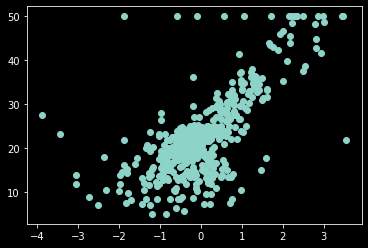

In [27]:
# Plot Y vs any features

plt.scatter(X[:, 5], y)
plt.show()

# Section 2 : Linear Regression on Multiple Features

- Boston Housing Dataset

In [41]:
X.shape, y.shape

((506, 14), (506,))

- $X_{ij}$ means $X$ value at $i$ th row and $j$ th feature
- We will also add one feature $X_i[0]$ (dummy feature) such that we can take dot product between $theta.T$ and $X$

In [70]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones,X))
print(X.shape)
# Now we have added a dummy column with value 1 in each row

(506, 14)


In [32]:
# X - Matrix(m x n)
# x - Vector (Single Example with n features)

def hypothesis(X, theta):
    y_ = 0.0
    n = X.shape[0]
    
    for i in range(n):
        y_ += (theta[i] * X[i])
    
    return y_

def error(X, y, theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (y[i] - y_)**2
    
    return e / m

def gradient(X, y, theta):
    m, n  = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        # sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i], theta)
            grad[j] += (y_ - y[i]) * X[i][j]
    
    return grad/m
        
def gradient_descent(X, y, lr=0.1, max_steps=100):
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_steps):
        e = error(X, y, theta)
        error_list.append(e)
        
        grad = gradient(X, y, theta)
        
        for j in range(n):
            theta[j] -= lr * grad[j]
    
    
    return theta, error_list

In [33]:
import time
start = time.time()
theta, error_list = gradient_descent(X,y)
end = time.time()
print(f"Time taken {end-start}")

Time taken 3.170527458190918


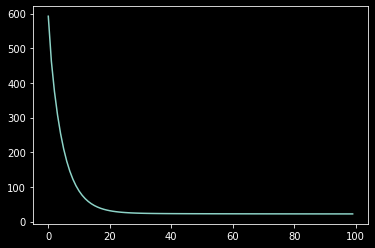

In [34]:
plt.plot(error_list)
plt.show()

## Predictions

In [35]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [38]:
def R2_score(y_, y):
    num = np.sum((y_ - y)**2)
    denom = np.sum((y - y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [39]:
R2_score(y_, y)

73.74793148398027

# Section 3 - Optimising Code using Vectorization

Efficient implementation using Vectorization:
- Avoid loops in the implementation, except gradient descent main loop
- Use `numpy` functions like `np.sum()`, `np.dot()` which are quite fast and already optimized

In [71]:
def hypothesis2(X, theta):
    return np.dot(X, theta)

def error2(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis2(X, theta)
    e = np.sum((y_ - y)**2)
    
    return e / m

def gradient2(X, y, theta):
    y_ = hypothesis2(X, theta)
    grad = np.dot(X.T, (y_ - y))
    m = X.shape[0]
    
    return grad/m

def gradient_descent2(X, y, lr=0.1, max_iter=100):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iter):
        e = error2(X, y, theta)
        error_list.append(e)
        
        grad = gradient2(X, y, theta)
        theta = theta - lr * grad
    
    return theta, error_list

In [72]:
import time
start = time.time()
theta, error_list = gradient_descent2(X,y)
end = time.time()
print(f"Time taken {end-start}")

Time taken 0.004862308502197266


In [73]:
theta

array([22.53220782, -0.78185418,  0.81390376, -0.27302486,  0.74237969,
       -1.58190647,  2.88681934, -0.10320657, -2.74824502,  1.4628725 ,
       -0.88418974, -1.95313341,  0.87190431, -3.64467529])

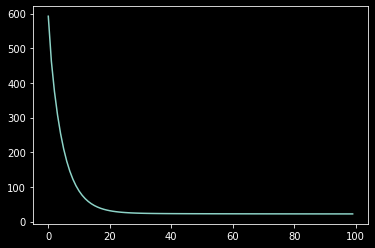

In [74]:
plt.plot(error_list)

In [75]:
y_ = hypothesis2(X, theta)
R2_score(y_, y)

73.74793148398027